In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dataset (XOR problem)
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

# Define a simple neural network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)   # input layer -> hidden
        self.output = nn.Linear(4, 1)  # hidden -> output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Initialize model, loss, and optimizer
model = XORNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 20000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass + update
    optimizer.zero_grad()   # reset gradients
    loss.backward()         # compute gradients
    optimizer.step()        # update weights

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Final predictions
print("Final predictions:")
print(model(X).detach())


Epoch 0, Loss: 0.2595
Epoch 1000, Loss: 0.2497
Epoch 2000, Loss: 0.2492
Epoch 3000, Loss: 0.2483
Epoch 4000, Loss: 0.2458
Epoch 5000, Loss: 0.2361
Epoch 6000, Loss: 0.1899
Epoch 7000, Loss: 0.0877
Epoch 8000, Loss: 0.0361
Epoch 9000, Loss: 0.0194
Epoch 10000, Loss: 0.0125
Epoch 11000, Loss: 0.0089
Epoch 12000, Loss: 0.0069
Epoch 13000, Loss: 0.0055
Epoch 14000, Loss: 0.0046
Epoch 15000, Loss: 0.0039
Epoch 16000, Loss: 0.0034
Epoch 17000, Loss: 0.0030
Epoch 18000, Loss: 0.0027
Epoch 19000, Loss: 0.0024
Final predictions:
tensor([[0.0494],
        [0.9517],
        [0.9560],
        [0.0455]])


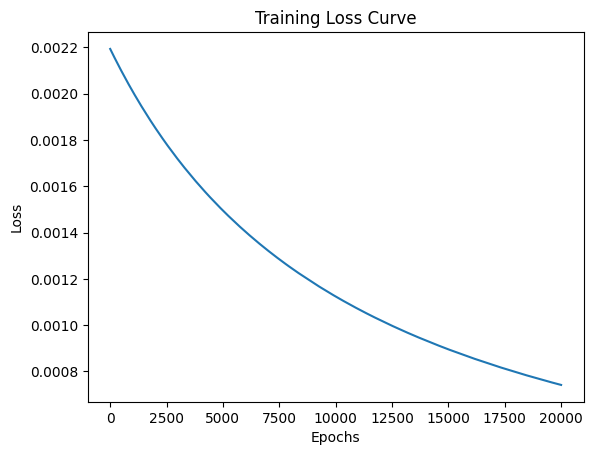

In [6]:
import matplotlib.pyplot as plt

losses = []

for epoch in range(epochs):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


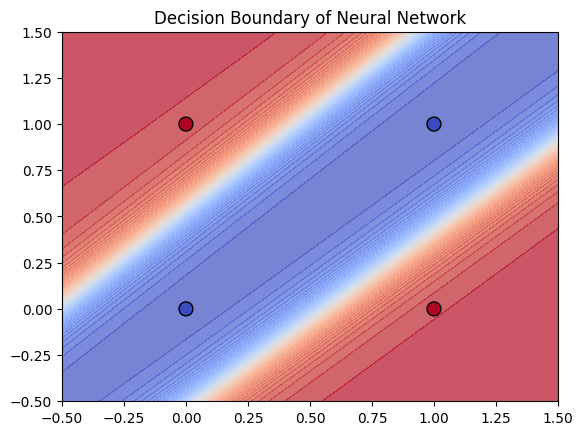

In [7]:
import numpy as np

# Create grid of points
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                     np.linspace(-0.5, 1.5, 200))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Get predictions
with torch.no_grad():
    Z = model(grid).numpy()
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=50, cmap="coolwarm", alpha=0.7)
plt.scatter(X[:,0], X[:,1], c=y[:,0], edgecolor='k', s=100, cmap="coolwarm")
plt.title("Decision Boundary of Neural Network")
plt.show()
